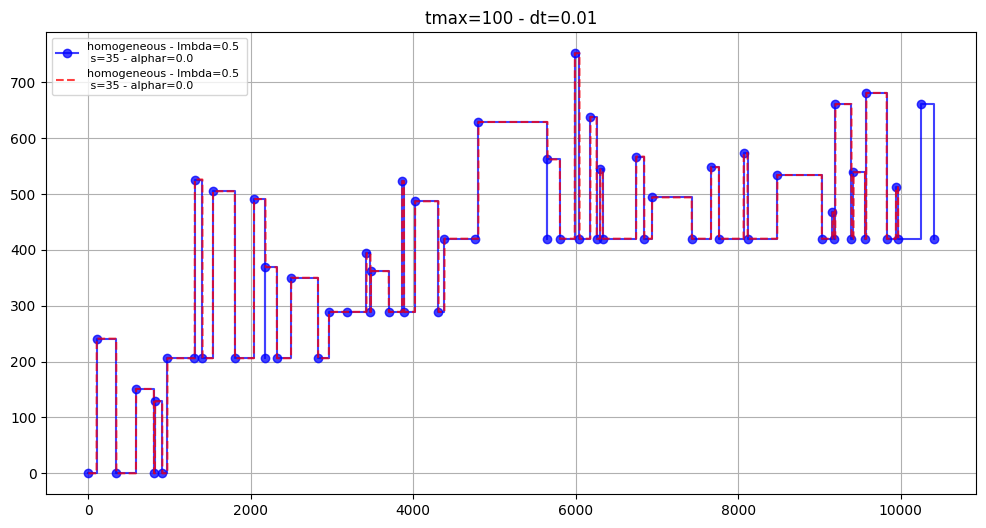

homogeneous - lmbda=0.5 
 s=35 - alphar=0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.0, 241.

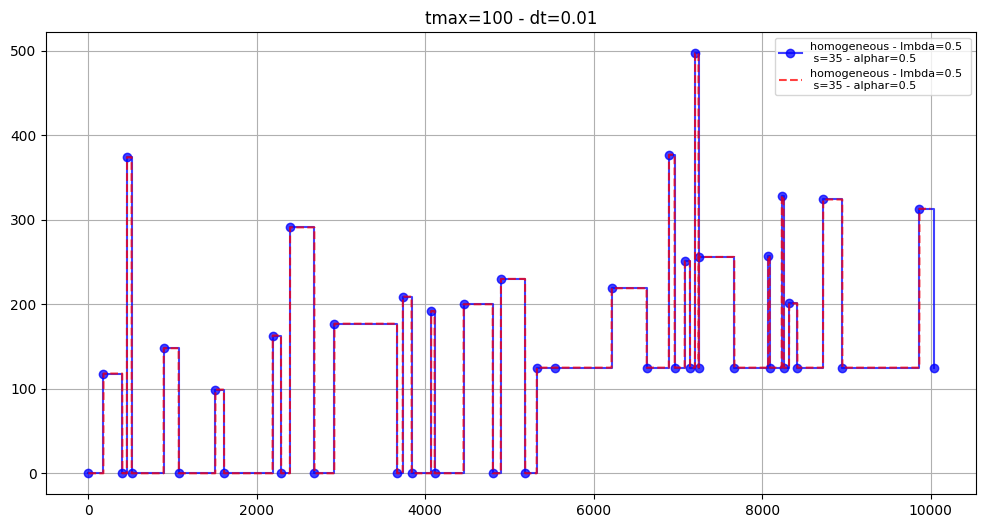

homogeneous - lmbda=0.5 
 s=35 - alphar=0.5
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.0, 118.

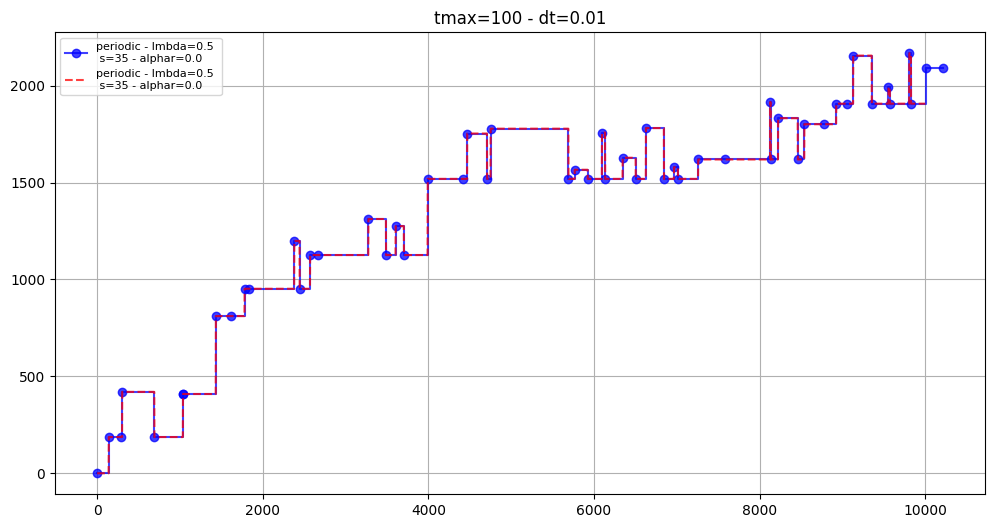

periodic - lmbda=0.5 
 s=35 - alphar=0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0, 187.0,

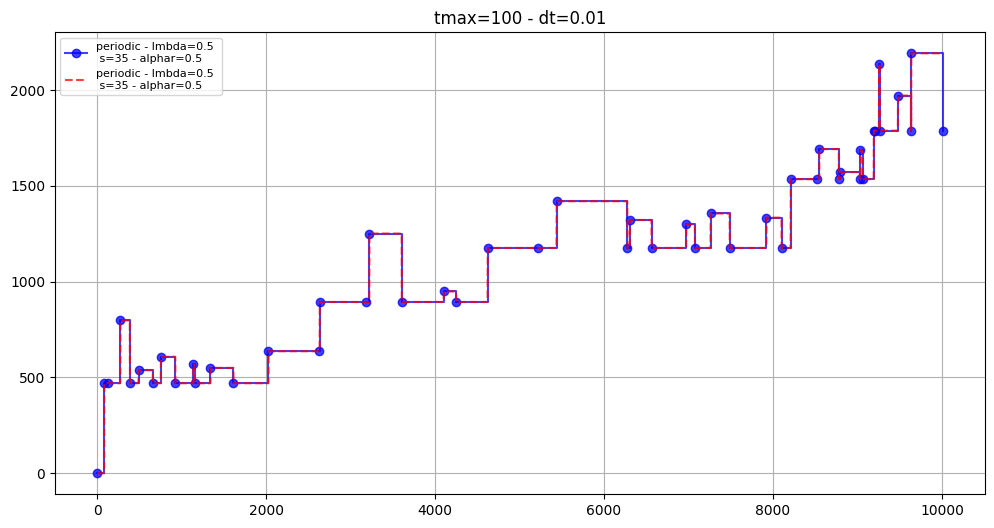

periodic - lmbda=0.5 
 s=35 - alphar=0.5
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470.0,

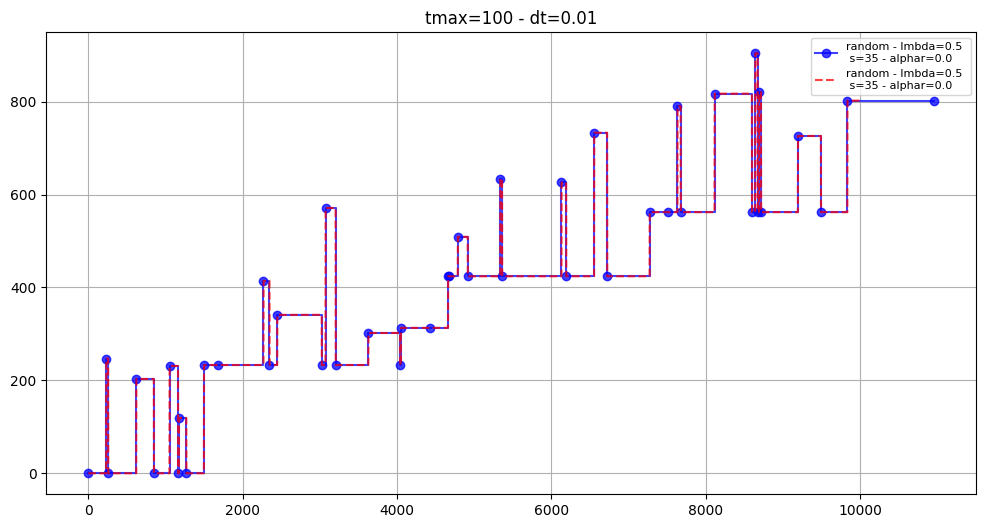

random - lmbda=0.5 
 s=35 - alphar=0.0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

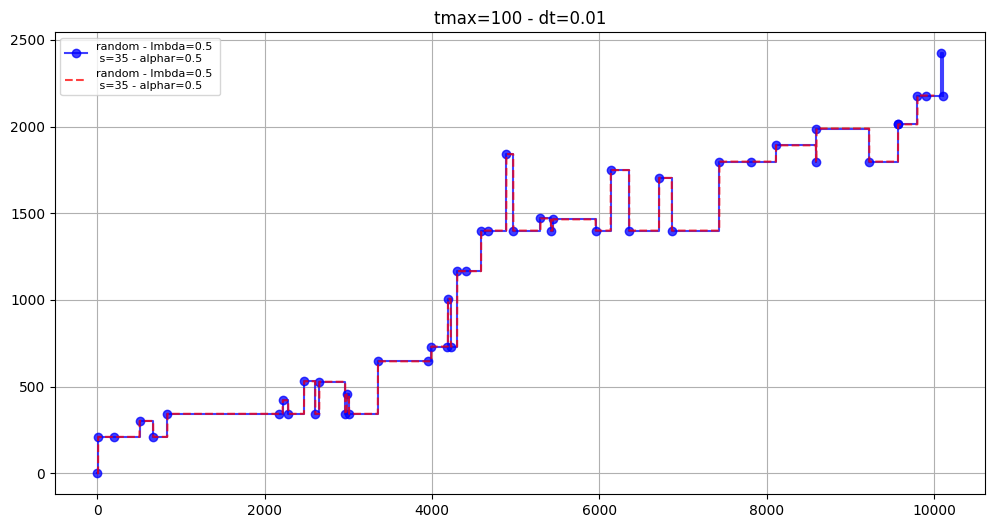

random - lmbda=0.5 
 s=35 - alphar=0.5
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.

In [41]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-15__PC/nucleo__shorttest_errors")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


# Loop
n_rows = df_all.height
cmap = plt.cm.plasma
colors = [cmap(i / max(n_rows - 1, 1)) for i in range(n_rows)]

for color, row in zip(colors, df_all.iter_rows(named=True)):
    
    plt.figure(figsize=(12,6))
    
    results     = row["results"]
    t_matrix    = row["t_matrix"]
    x_matrix    = row["x_matrix"]
    landscape   = row["landscape"]
    lmbda       = row["lmbda"]
    alphar      = row["alphar"]
    s           = row["s"]
    dt          = row["dt"]
    tmax        = row["tmax"]
    title       = f"{landscape} - lmbda={lmbda} \n s={s} - alphar={alphar}"
    
    to_plot     = results[1]
    
    t_matrix = np.array(t_matrix, dtype=float)
    x_matrix = np.array(x_matrix, dtype=float)
    
    plt.title(f"tmax={tmax} - dt={dt}")
    plt.plot(t_matrix[1] / dt, x_matrix[1], color="b", alpha=0.75,
             label=title, drawstyle="steps-post", marker="o")
    plt.plot(to_plot, color="r", alpha=0.75,
             label=title, ls="--")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.show()
    print(f"{title}")
    print(f"{results[1]}")
    print(f"{t_matrix[1]}")
    print(f"{x_matrix[1]}")

homogeneous - lmbda=0.5 
 s=35 - alphar=0.0 

v_mean : 5.02
v_mean_th : 5.00
v_mean_th_eff : 5.00


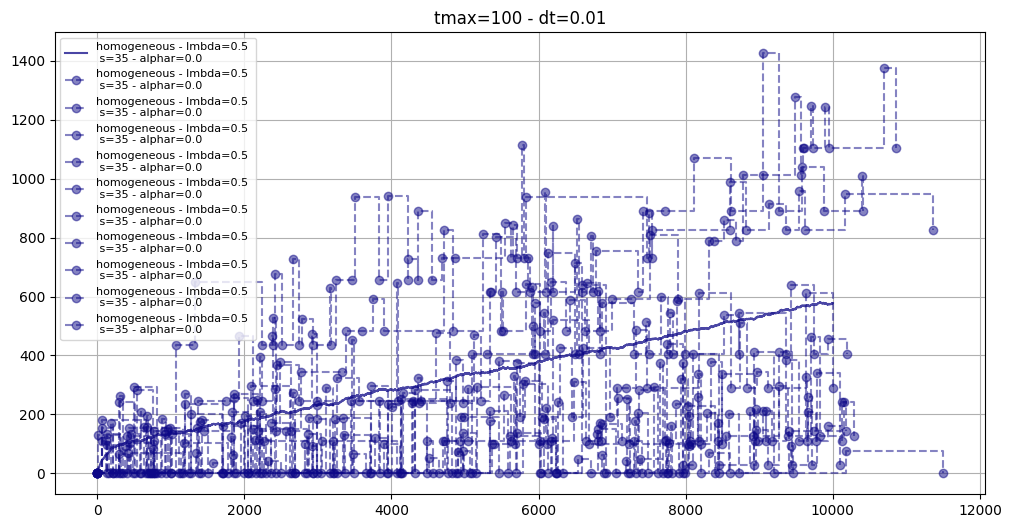

homogeneous - lmbda=0.5 
 s=35 - alphar=0.5 

v_mean : 5.14
v_mean_th : 9.38
v_mean_th_eff : 9.38


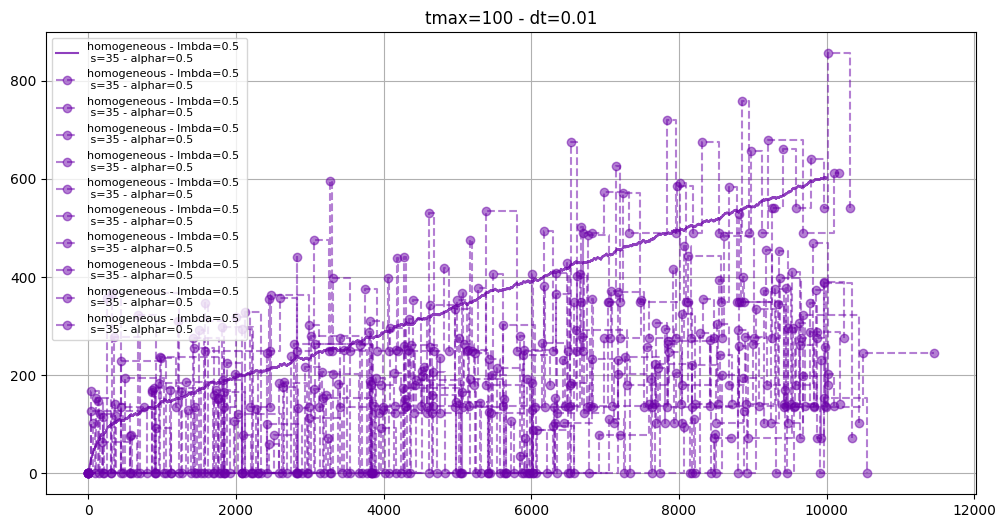

periodic - lmbda=0.5 
 s=35 - alphar=0.0 

v_mean : 5.00
v_mean_th : 5.00
v_mean_th_eff : 5.00


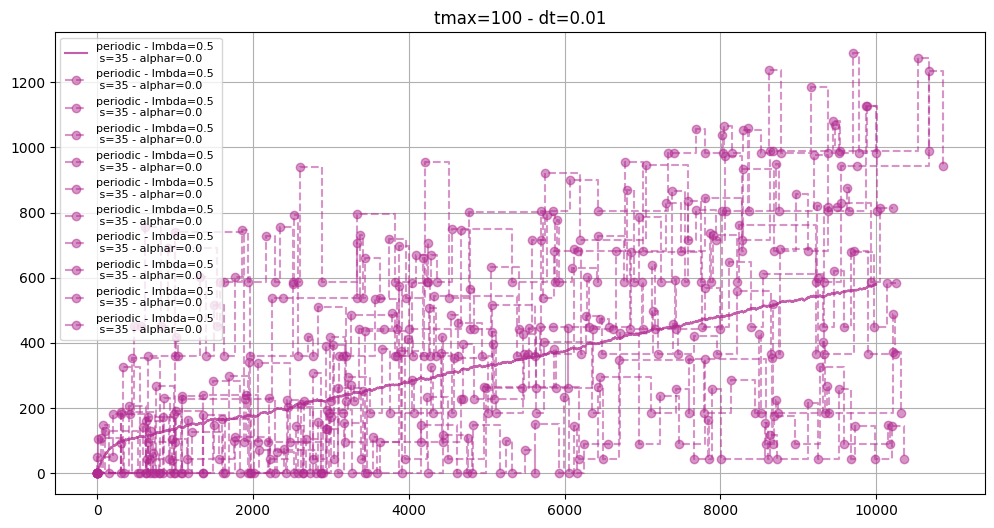

periodic - lmbda=0.5 
 s=35 - alphar=0.5 

v_mean : 5.20
v_mean_th : 9.38
v_mean_th_eff : 9.37


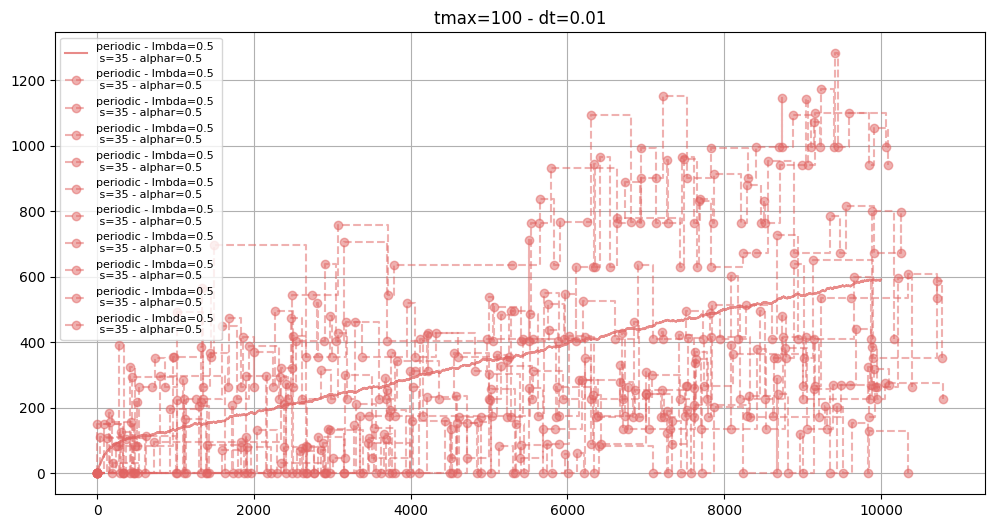

random - lmbda=0.5 
 s=35 - alphar=0.0 

v_mean : 4.73
v_mean_th : 5.00
v_mean_th_eff : 5.00


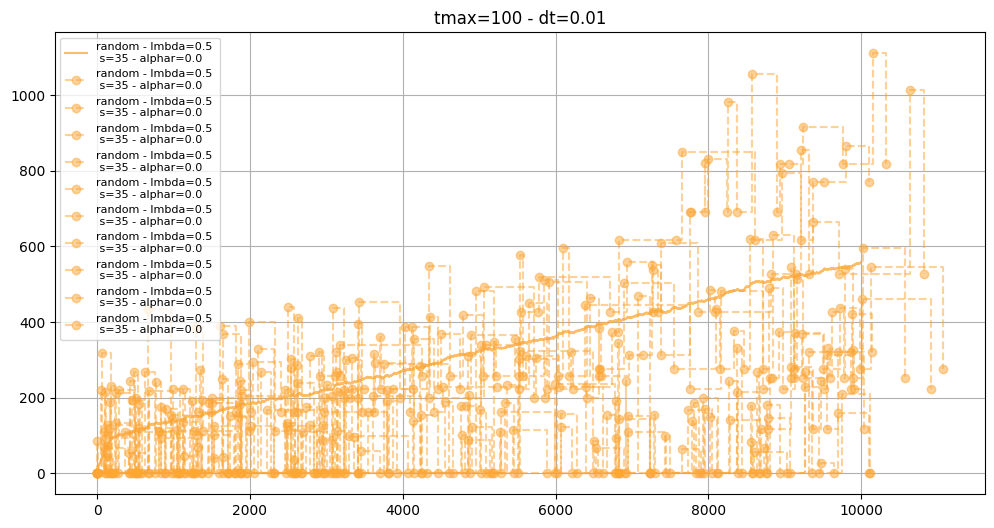

random - lmbda=0.5 
 s=35 - alphar=0.5 

v_mean : 4.73
v_mean_th : 9.38
v_mean_th_eff : 9.37


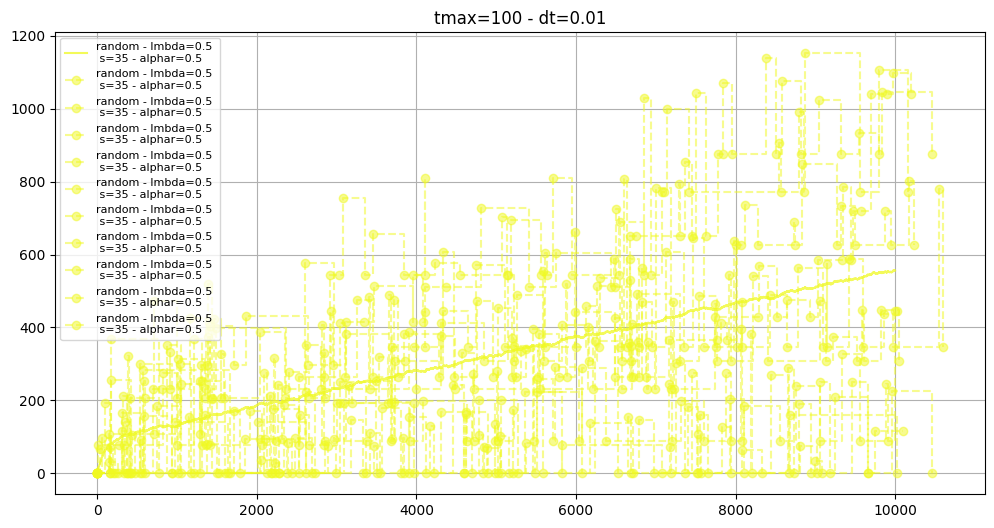

In [61]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-12-15__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


# Loop
n_rows = df_all.height
cmap = plt.cm.plasma
colors = [cmap(i / max(n_rows - 1, 1)) for i in range(n_rows)]

for color, row in zip(colors, df_all.iter_rows(named=True)):
    
    plt.figure(figsize=(12,6))
    
    results     = row["results"]
    t_matrix    = row["t_matrix"]
    x_matrix    = row["x_matrix"]
    landscape   = row["landscape"]
    lmbda       = row["lmbda"]
    alphar      = row["alphar"]
    s           = row["s"]
    dt          = row["dt"]
    tmax        = row["tmax"]
    results_mean = row["results_mean"]
    title       = f"{landscape} - lmbda={lmbda} \n s={s} - alphar={alphar}"
    
    to_plot     = results[1]
    t_matrix = np.array(t_matrix, dtype=float)
    x_matrix = np.array(x_matrix, dtype=float)
    
    v_mean      = row["v_mean"]
    v_med       = row["v_med"]
    v_mean_th    = row["v_mean_th"]
    v_mean_th_eff    = row["v_mean_th_eff"]
    
    print(f"{title} \n")
    print(f"v_mean : {v_mean:.2f}")
    # print(f"v_med : {v_med:.2f}")
    print(f"v_mean_th : {v_mean_th:.2f}")
    print(f"v_mean_th_eff : {v_mean_th_eff:.2f}")
    
    plt.title(f"tmax={tmax} - dt={dt}")
    plt.plot(results_mean, color=color, alpha=0.75,
             label=title, ls="-")
    for i in range(10):
        plt.plot(t_matrix[i] / dt, x_matrix[i], color=color, alpha=0.50,
            label=title, drawstyle="steps-post", marker="o", ls="--")
    plt.legend(fontsize=8)
    plt.grid(True)
    plt.show()

# .